In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def buildAndTrainTheModel(x,y):
    ANNreg=nn.Sequential(nn.Linear(1,1),nn.ReLU(),nn.Linear(1,1))
    
    learningRate= 0.05
    lossfun=nn.MSELoss()
    optimizer=torch.optim.SGD(ANNreg.parameters(),lr=learningRate)
    
    numepochs=500
    losses=torch.zeros(numepochs)

    for epochi in range(numepochs):

        yHat=ANNreg(x)

        loss=lossfun(yHat,y)
        losses[epochi]=loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    predictions=ANNreg(x)
    
    return predictions,losses

In [12]:
def createTheData(m):
    N=50
    x=torch.randn(N,1)
    y=m*x+torch.randn(N,1)/2
    return x,y

In [15]:
x,y=createTheData(0.8)

yHat,losses=buildAndTrainTheModel(x,y)



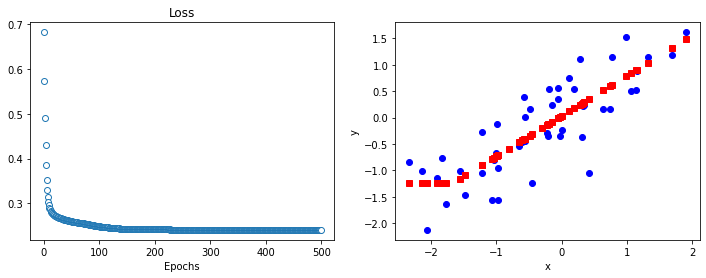

In [29]:
fig,ax=plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=0.1)
ax[0].set_xlabel('Epochs')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real Data')
ax[1].plot(x,yHat.detach(),'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')


plt.show()

In [24]:
yHat.dtype,x.dtype

(torch.float32, torch.float32)

In [37]:
slopes=np.linspace(-2,2,21)

numExps=50

results = np.zeros((len(slopes),numExps,2))
 
for slopei in range(len(slopes)):
    for N in range (numExps):
        
        x,y = createTheData(slopes[slopei])
        yHat,losses = buildAndTrainTheModel(x,y)
        
        results[slopei,N,0]=losses[-1]
        results[slopei,N,1]=np.corrcoef(y.T,yHat.detach().T)[0,1]
results[np.isnan(results)]=0

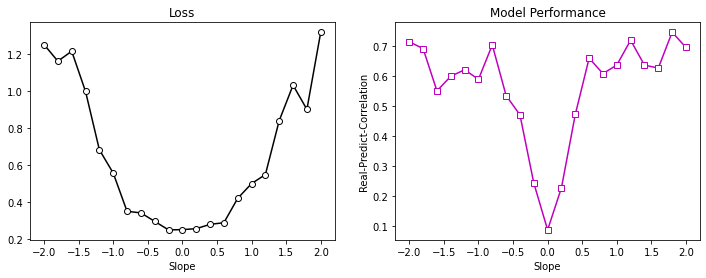

In [41]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w')
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w')
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-Predict-Correlation')
ax[1].set_title('Model Performance')

plt.show();